<a href="https://colab.research.google.com/github/currencyfxjle/Network_analytics_robust_version/blob/main/Analitica_de_Redes_Sociales_JoseLizarraga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

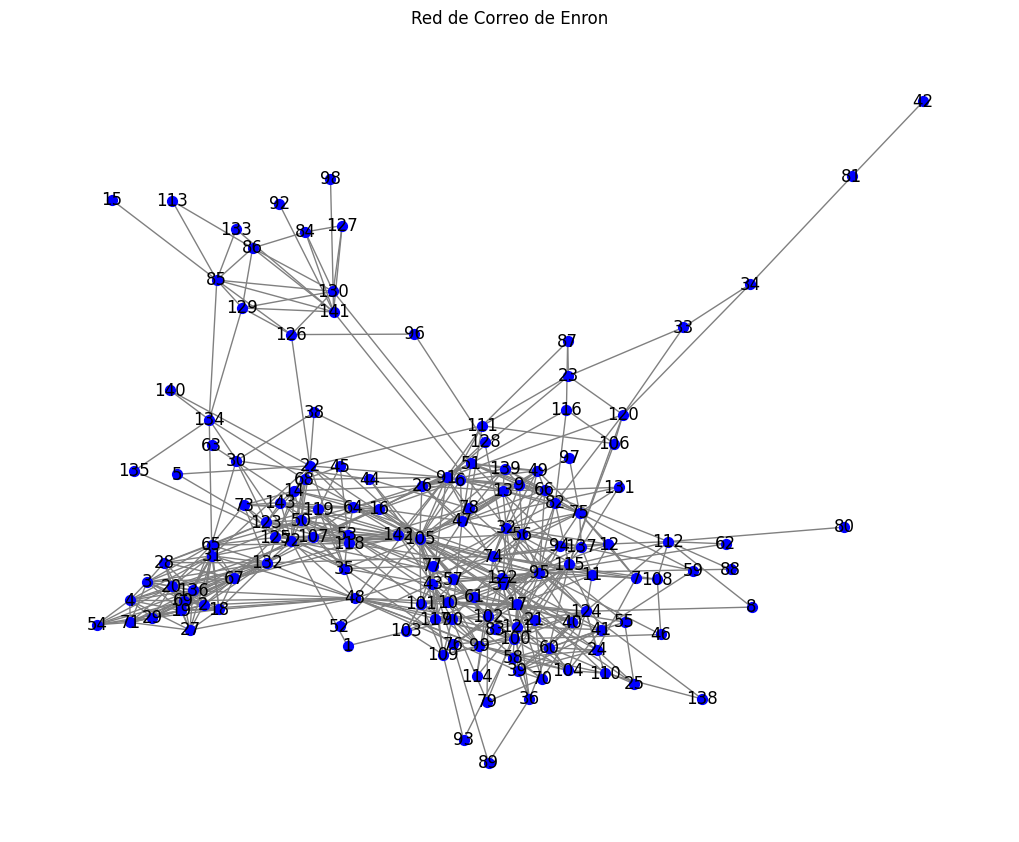

Diámetro de la red: 8
Nodos con mayor centralidad de grado: [105, 17, 95, 48, 132]


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.io import mmread  # Importar si el archivo .mtx necesita ser leído como una matriz dispersa

df = pd.read_csv('/content/email-enron-only.mtx', sep=" ", header=None, names=['sender', 'receiver'])

# Crear una red no dirigida a partir del DataFrame
G = nx.from_pandas_edgelist(df, 'sender', 'receiver', create_using=nx.Graph())

# Visualizar la red
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Posicionamiento de nodos
nx.draw(G, pos, with_labels=True, node_size=50, node_color='blue', edge_color='grey')
plt.title('Red de Correo de Enron')
plt.show()

# Análisis de distancias en la red
print("Diámetro de la red:", nx.diameter(G))

# Análisis de resiliencia - Aquí podrías querer analizar cómo la red responde a fallos, como eliminar nodos aleatoriamente

# Análisis de centralidades
degree_centrality = nx.degree_centrality(G)
# Imprimir los nodos con mayor centralidad de grado
print("Nodos con mayor centralidad de grado:", sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5])

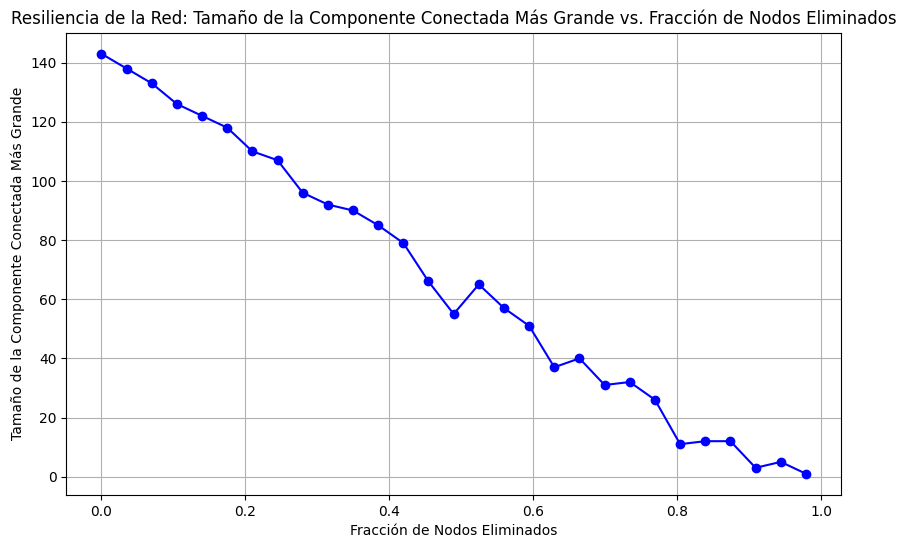

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Supongamos que G es tu red de Enron ya creada

def plot_network_resilience(G, iterations=100, step=5):
    original_size = len(G)
    sizes = []
    removal_fraction = []

    for i in range(0, original_size, step):
        # Copia la red para no alterar la original
        G_temp = G.copy()
        # Eliminar nodos aleatoriamente
        nodes_to_remove = np.random.choice(G_temp.nodes(), size=i, replace=False)
        G_temp.remove_nodes_from(nodes_to_remove)

        # Calcular el tamaño de la componente conectada más grande
        largest_cc = max(nx.connected_components(G_temp), key=len)
        sizes.append(len(largest_cc))
        removal_fraction.append(i/original_size)

        if len(G_temp) == 0:  # Si ya no quedan nodos, salir del bucle
            break

    # Graficar los resultados
    plt.figure(figsize=(10, 6))
    plt.plot(removal_fraction, sizes, marker='o', linestyle='-', color='b')
    plt.title('Resiliencia de la Red: Tamaño de la Componente Conectada Más Grande vs. Fracción de Nodos Eliminados')
    plt.xlabel('Fracción de Nodos Eliminados')
    plt.ylabel('Tamaño de la Componente Conectada Más Grande')
    plt.grid(True)
    plt.show()

# Ejecutar la simulación de resiliencia en la red de Enron
plot_network_resilience(G)

**2. Visualización de los Elementos en la Red**

Para mejorar la visualización y hacerla más informativa, manipularemos el color, el tamaño y la transparencia de nodos y arcos. Utilizaremos la centralidad de grado como ejemplo para manipular el tamaño y el color de los nodos.

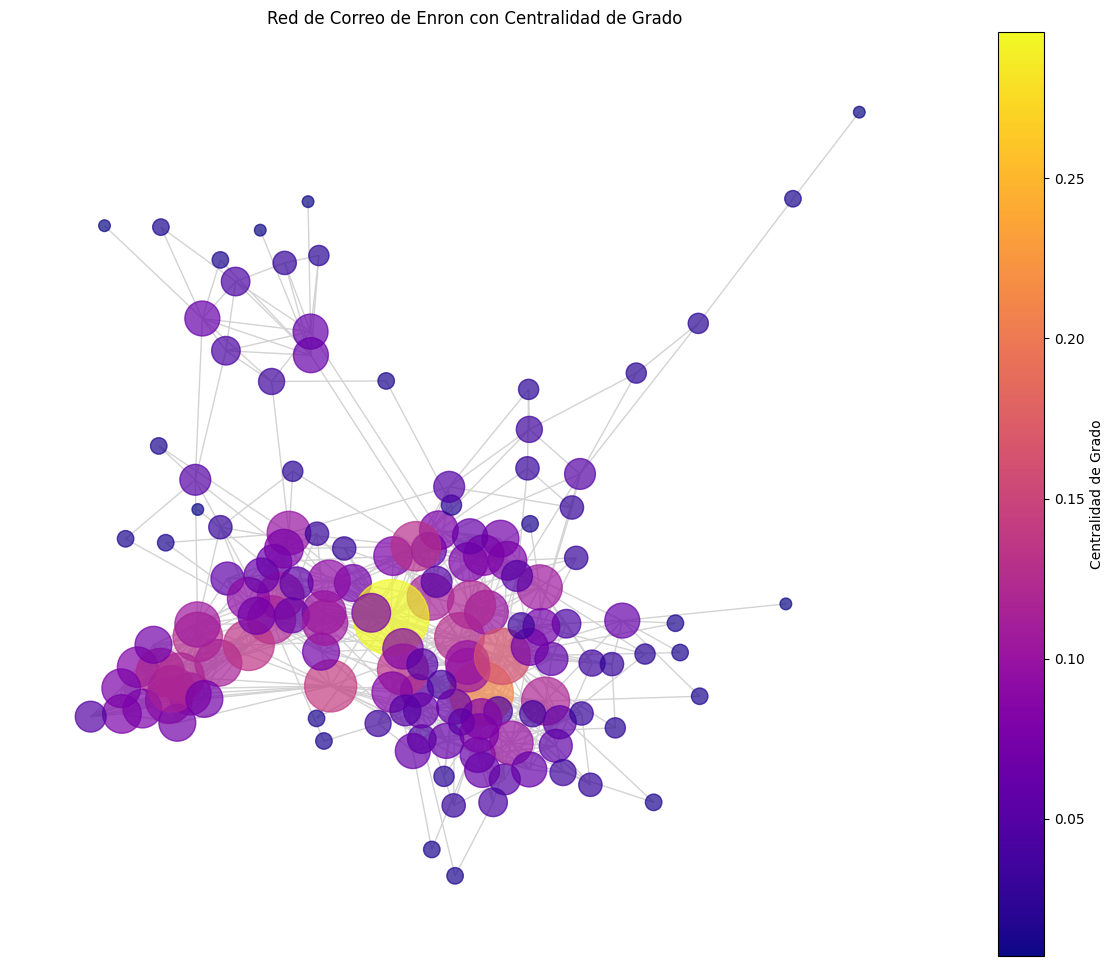

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Asumiendo que G y pos ya están definidos

# Calcula la centralidad de grado para cada nodo
centralidad_de_grado = nx.degree_centrality(G)

# Normaliza los valores de centralidad de grado para el tamaño del nodo
tamaños_nodos = [v * 10000 for v in centralidad_de_grado.values()]

# Colores de nodos basados en la centralidad de grado
colores_nodos = [v for v in centralidad_de_grado.values()]

# Crea la figura y los ejes para la visualización
fig, ax = plt.subplots(figsize=(15, 12))

# Dibuja los nodos de la red
nodes = nx.draw_networkx_nodes(G, pos, node_size=tamaños_nodos, node_color=colores_nodos, cmap=plt.cm.plasma, alpha=0.7, ax=ax)
# Dibuja los enlaces de la red
edges = nx.draw_networkx_edges(G, pos, ax=ax, edge_color='lightgray')

# Añade la barra de color usando el objeto "mappable" adecuado
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(colores_nodos), vmax=max(colores_nodos)))
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Centralidad de Grado')

# Oculta los ejes
ax.set_axis_off()

# Añade un título y muestra el gráfico
plt.title('Red de Correo de Enron con Centralidad de Grado')
plt.show()

**3. Calcula las Propiedades de la Estructura de la Red**

Para calcular y mostrar propiedades como el diámetro, el promedio de los caminos más cortos, y determinar si la red es bipartita.

In [7]:
# Calcula el diámetro de la red
try:
    diametro = nx.diameter(G)
    print("Diámetro de la red:", diametro)
except nx.NetworkXError:
    print("La red es demasiado grande o no está conectada completamente para calcular el diámetro.")

# Calcula el promedio de los caminos más cortos
try:
    promedio_caminos = nx.average_shortest_path_length(G)
    print("Promedio de los caminos más cortos en la red:", promedio_caminos)
except nx.NetworkXError:
    print("La red es demasiado grande o no está conectada completamente para calcular el promedio de caminos más cortos.")

# Determina si la red es bipartita
es_bipartita = nx.is_bipartite(G)
print("La red es bipartita:", es_bipartita)

# Calcula la densidad de la red
densidad = nx.density(G)
print(f"Densidad de la red: {densidad}")

# Calcula el coeficiente de clustering promedio para la red
coeficiente_clustering = nx.average_clustering(G)
print(f"Coeficiente de Clustering promedio: {coeficiente_clustering}")

# Identifica el número de componentes conectados
componentes_conectados = nx.number_connected_components(G)
print(f"Componentes conectados en la red: {componentes_conectados}")

# Calcula la centralidad de vector propio (eigenvector centrality)
centralidad_vector_propio = nx.eigenvector_centrality(G, max_iter=1000)
nodo_max_vector_propio = max(centralidad_vector_propio, key=centralidad_vector_propio.get)
print(f"Nodo con mayor centralidad de vector propio: {nodo_max_vector_propio} (Centralidad: {centralidad_vector_propio[nodo_max_vector_propio]:.4f})")

# Agrega interpretaciones basadas en los resultados
print("\nInterpretación:")
print("Una densidad baja indica que la red no está muy conectada, lo que sugiere grandes oportunidades para fortalecer las conexiones entre nodos.")
print("El coeficiente de clustering proporciona una idea de la tendencia de los nodos a crear grupos más cerrados dentro de la red.")
print(f"La existencia de {componentes_conectados} componentes conectados indica subredes independientes dentro de la red global.")
print("La centralidad de vector propio destaca los nodos más influyentes basados en la estructura global de la red.")

Diámetro de la red: 8
Promedio de los caminos más cortos en la red: 2.967004826159756
La red es bipartita: False
Densidad de la red: 0.061361174037230376
Coeficiente de Clustering promedio: 0.43390702914792223
Componentes conectados en la red: 1
Nodo con mayor centralidad de vector propio: 105 (Centralidad: 0.2514)

Interpretación:
Una densidad baja indica que la red no está muy conectada, lo que sugiere grandes oportunidades para fortalecer las conexiones entre nodos.
El coeficiente de clustering proporciona una idea de la tendencia de los nodos a crear grupos más cerrados dentro de la red.
La existencia de 1 componentes conectados indica subredes independientes dentro de la red global.
La centralidad de vector propio destaca los nodos más influyentes basados en la estructura global de la red.


**4. Analiza la Robustez de la Red**

Para analizar la robustez de la red, identificaremos nodos y arcos críticos cuya remoción podría desfragmentar la red. Luego visualizaremos estos elementos de manera destacada.

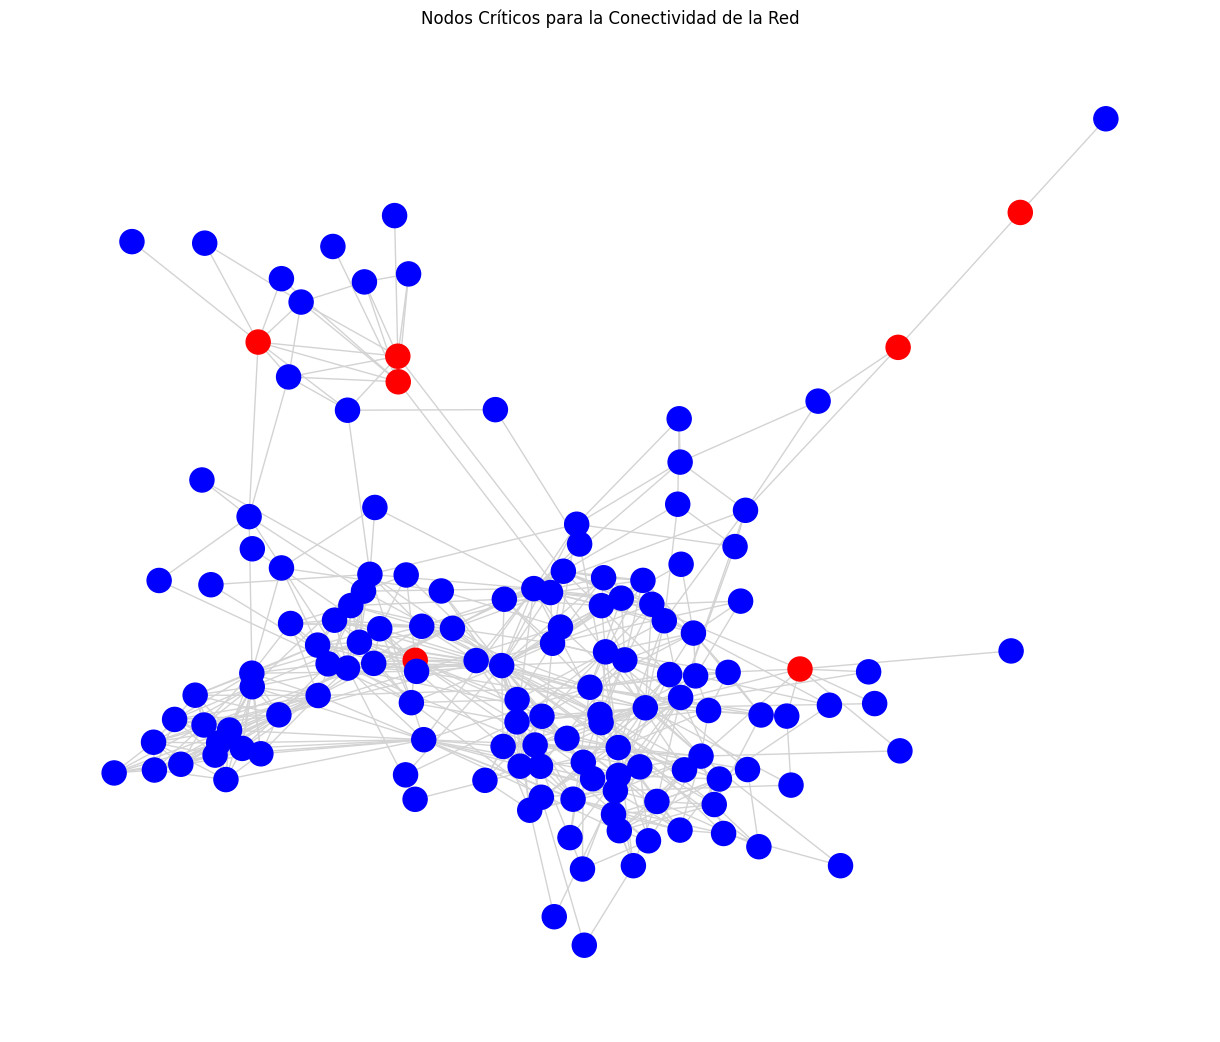

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Asumiendo que G ya está definido y pos contiene las posiciones de los nodos para la visualización

# Identifica nodos críticos para la conectividad de la red
nodos_criticos = list(nx.articulation_points(G))

# Para redes grandes, este proceso puede ser intensivo. Considera evaluar la necesidad de visualización en redes muy grandes.

# Visualiza nodos críticos con un color diferente
colores_nodos = ['red' if node in nodos_criticos else 'blue' for node in G.nodes()]
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=False, node_color=colores_nodos, edge_color='lightgray')
plt.title('Nodos Críticos para la Conectividad de la Red')
plt.show()

**5. Utiliza las Métricas de Centralidad**

Para un análisis más completo de la red, expandiremos el uso de las métricas de centralidad para incluir la centralidad de cercanía y la de intermediación, además de la de grado que ya has calculado. Luego visualizaremos los resultados de manera efectiva.

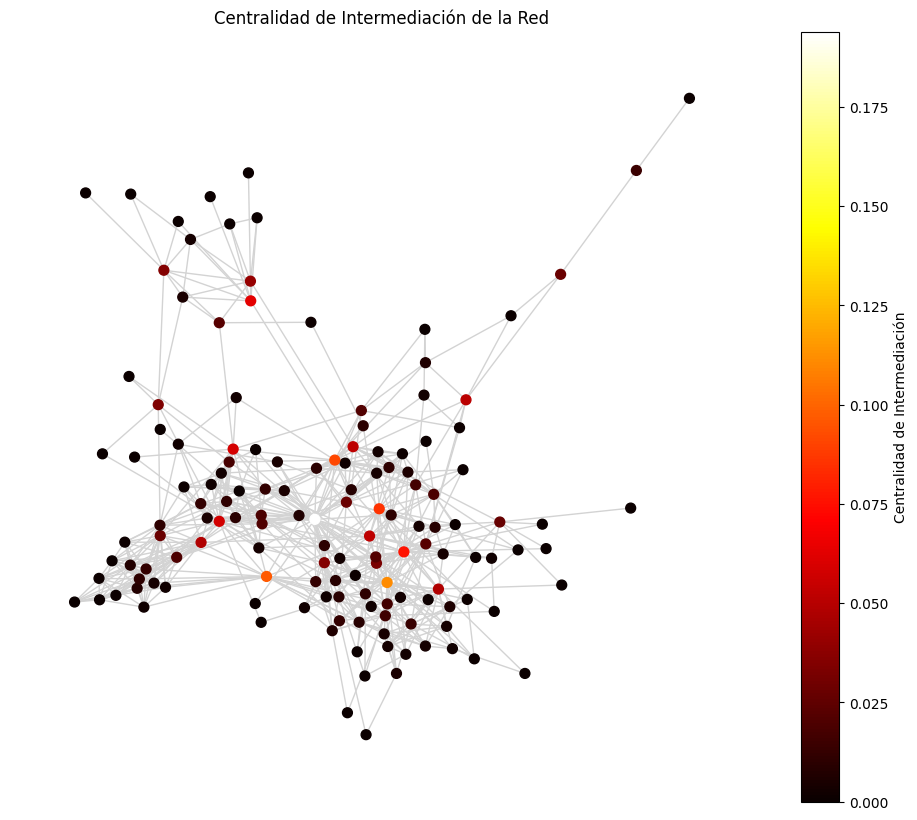

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

# Asumiendo que G y pos ya están definidos

# Calcula la centralidad de intermediación
centralidad_intermediacion = nx.betweenness_centrality(G)

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 10))

# Dibuja la red
nodes = nx.draw_networkx_nodes(G, pos, node_size=50, node_color=list(centralidad_intermediacion.values()), cmap=plt.cm.hot, ax=ax)
edges = nx.draw_networkx_edges(G, pos, edge_color='lightgray', ax=ax)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.hot, norm=plt.Normalize(vmin=min(centralidad_intermediacion.values()), vmax=max(centralidad_intermediacion.values()))), ax=ax, label='Centralidad de Intermediación')

# Oculta los ejes
ax.set_axis_off()

# Añade un título y muestra el gráfico
plt.title('Centralidad de Intermediación de la Red')
plt.show()